In [9]:
import mysql.connector
from mysql.connector import Error
conn=None

try:
    conn=mysql.connector.connect(host='localhost',
                                 database='mydb',
                                 user='root',
                                 password='root123',
                                 auth_plugin='mysql_native_password'
                                      )
    if conn.is_connected():
        print("Connected to MySQL database")
    
    std=[
        ('a',0,1.1,39343),
        ('b',1,1.3,46205),
('c',2,1.5,37731),
('d',3,2.0,43525),
('e',4,2.2,39891),
('f',5,2.9,56642),
('g',6,3.0,60150),
('h',7,3.2,54445),
('i',8,3.2,64445),
('j',9,3.7,57189),
('k',10,3.9,63218),
('l',11,4.0,55794),
('m',12,4.0,56957),
('n',13,4.1,57081),
('o',14,4.5,61111),
('p',15,4.9,67938),
('q',16,5.1,66029),
('r',17,5.3,83088),
('s',18,5.9,81363),
('t',19,6.0,93940),
('u',20,6.8,91738),
('v',21,7.1,98273),
('w',22,7.9,101302),
('x',23,8.2,113812),
('y',24,8.7,109431),
('z',25,9.0,105582),
('ab',26,9.5,116969),
('ecd',27,9.6,112635),
('ef',28,10.3,122391),
('gh',29,10.5,121872)
 
        
    ]   
    
    query="insert into salary values(%s,%s,%s,%s) "
    
    cursor=conn.cursor()
    
    cursor.executemany(query,std)
    
    conn.commit()
    
    query="select * from salary"
    cursor.execute(query)
    print(cursor.fetchall())
    
except Error as e:
    print(e)
    
finally:
    if conn is not None and conn.is_connected():
        conn.close()

Connected to MySQL database
[('a', 0, 1.1, 39343), ('b', 1, 1.3, 46205), ('c', 2, 1.5, 37731), ('d', 3, 2.0, 43525), ('e', 4, 2.2, 39891), ('f', 5, 2.9, 56642), ('g', 6, 3.0, 60150), ('h', 7, 3.2, 54445), ('i', 8, 3.2, 64445), ('j', 9, 3.7, 57189), ('k', 10, 3.9, 63218), ('l', 11, 4.0, 55794), ('m', 12, 4.0, 56957), ('n', 13, 4.1, 57081), ('o', 14, 4.5, 61111), ('p', 15, 4.9, 67938), ('q', 16, 5.1, 66029), ('r', 17, 5.3, 83088), ('s', 18, 5.9, 81363), ('t', 19, 6.0, 93940), ('u', 20, 6.8, 91738), ('v', 21, 7.1, 98273), ('w', 22, 7.9, 101302), ('x', 23, 8.2, 113812), ('y', 24, 8.7, 109431), ('z', 25, 9.0, 105582), ('ab', 26, 9.5, 116969), ('ecd', 27, 9.6, 112635), ('ef', 28, 10.3, 122391), ('gh', 29, 10.5, 121872)]


In [10]:
import mysql.connector
import pandas as pd
from mysql.connector import Error
conn=None
try:
        conn=mysql.connector.connect(host='localhost',
                                     database='mydb',
                                     user='root',
                                     password='root123',
                                    auth_plugin='mysql_native_password')
        
        if conn.is_connected():
            print('Connected to MySQL database')
            
        query="select * from salary"
        cursor=conn.cursor()
        cursor.execute(query)
        row=cursor.fetchall()
        
        results=pd.read_sql_query(query,conn)
        results.to_csv("output.csv",index=False)
        
except Error as e:
    print(e)
    
finally:
    if conn is not None and conn.is_connected():
        conn.close()

Connected to MySQL database


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset=pd.read_csv("output.csv")

In [13]:
dataset

,company_name,emp_id,yr_of_exp,salary
0,a,0,1.1,39343
1,b,1,1.3,46205
2,c,2,1.5,37731
3,d,3,2.0,43525
4,e,4,2.2,39891
5,f,5,2.9,56642
6,g,6,3.0,60150
7,h,7,3.2,54445
8,i,8,3.2,64445
9,j,9,3.7,57189


In [15]:
#Finding linearity

cor=dataset.corr()  #correlation matrix

cor

,emp_id,yr_of_exp,salary
emp_id,1.000000,0.986460,0.960826
yr_of_exp,0.986460,1.000000,0.978242
salary,0.960826,0.978242,1.000000


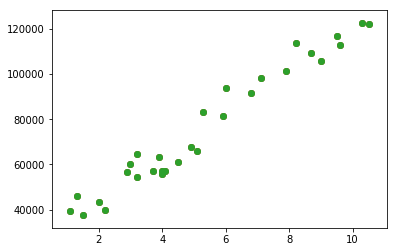

In [18]:
plt.scatter(dataset['yr_of_exp'],dataset['salary'])
plt.show()

In [19]:
X=dataset.iloc[:,2:3]
y=dataset.iloc[:,3]

In [20]:
X

,yr_of_exp
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [21]:
y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
Name: salary, dtype: int64

In [22]:
dataset.isnull().sum()

company_name    0
emp_id          0
yr_of_exp       0
salary          0
dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Y=sc.fit_transform(dataset[['salary']])

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [24]:
Y

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

In [25]:
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.1,random_state=0)

In [26]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
y_pred=reg.predict(X_test)

In [33]:
#que 5
ans=reg.predict([[2.25]])
print(ans)

[[-1.05146204]]


In [35]:
sc.inverse_transform(ans)  

array([[ 47662.25987082]])

In [38]:
#question 6 (finding rmse and r2 score)

from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred)*100)
print(mean_squared_error(y_test,y_pred))

98.174049602
0.0329727969728
